# Patient charges || clustering and regression

### The impact of Medicine to your wallet

### Importing libraries



In [2]:
import numpy as np
import pandas as pd

# Matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/raw/insurance.csv')
df.head()

# lest's store the original dataframe in another variable
original_df = df.copy()

In [4]:
%matplotlib inline
sns.set_style(style = 'whitegrid')
sns.set_context(context = 'notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

### Distribution of Medical Charges
* **Types of Distribution**: We have a **right skewed distribution** in wich most patients are being charge between 20000 - 12000.

* **Using Logarithms**: Logarithms helps us have a **normal distribution** which could help us in concepts of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for our predictive modell in the foreseen future. (We will come to this later in the kernel)

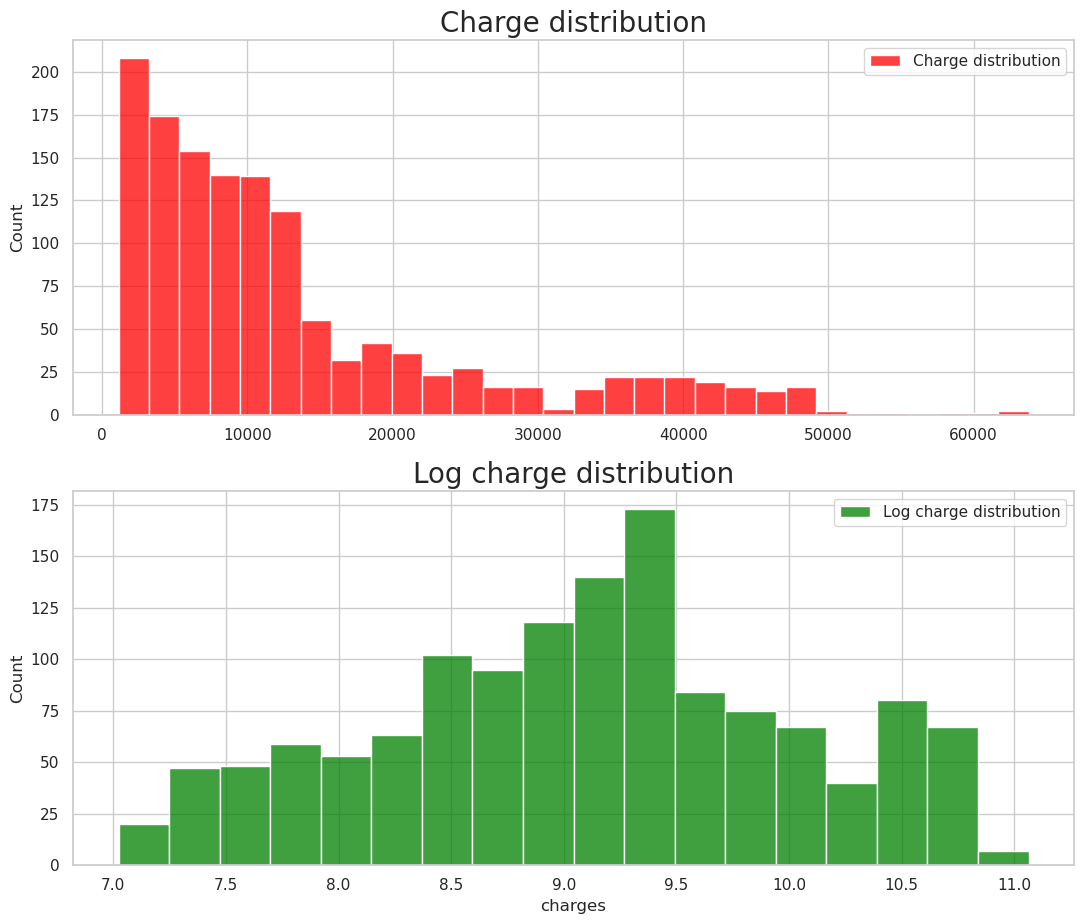

In [5]:
# Determine the distribution of charge 
charge_dist = df['charges'].values
logcharge = np.log(df['charges'])

fig,(ax1,ax2) = plt.subplots(2,1) 

sns.histplot(charge_dist, ax = ax1, color='red', label='Charge distribution') 
ax1.set_title('Charge distribution', fontsize = 20)
ax1.legend(loc='upper right')

sns.histplot(logcharge, ax = ax2, color='green', label='Log charge distribution')
ax2.set_title('Log charge distribution', fontsize = 20)
ax2.legend(loc='upper right')


plt.tight_layout()


### Age Analysis: 

Turning Age into Categorical Variable: 
* **Young Adult**: from 18 - 35
* **Senior Adutl**: from 36 - 55
* **Elder**: 56 or older
* **Share of each category**: Young Adults (42.9%), Senior Adults(41%) and older (16.1%)

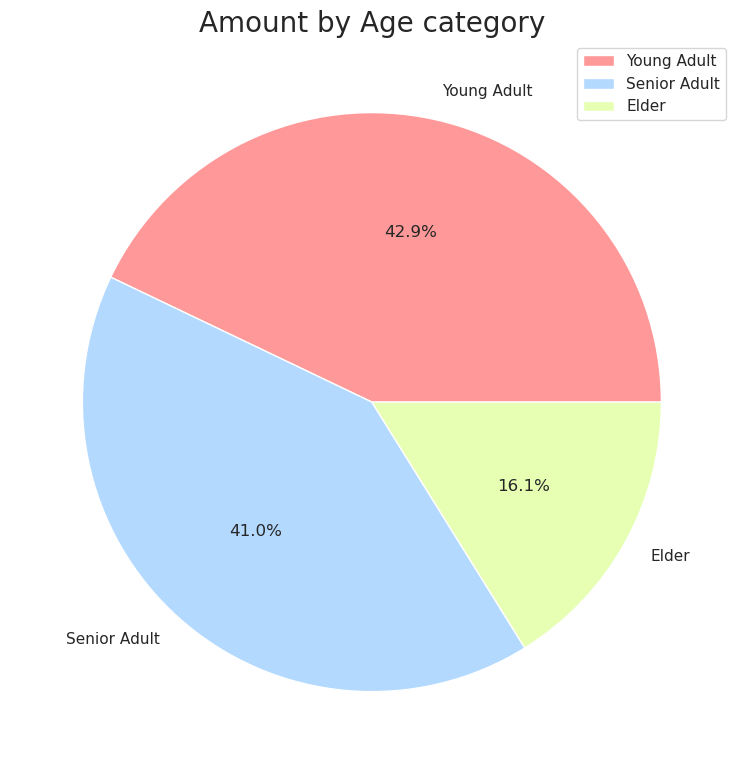

In [6]:
df['age_cat'] = (
    df['age']
    .apply(
        lambda x: 'Young Adult' if 18 <=  x <= 35 else 'Senior Adult' if 35 < x <= 55 else 'Elder'
    )
)

labels = df['age_cat'].unique().tolist()
amount = df['age_cat'].value_counts().tolist()

colors= ["#ff9999", "#b3d9ff", "#e6ffb3"]

plt.pie(amount, labels = labels, autopct = '%1.1f%%', colors=colors);
plt.title('Amount by Age category', fontsize = 20);
plt.legend(loc='upper right');


### Is there a Relationship between BMI and Age
* **BMI frequency**: Most of the BMI frequency is concentrated between 27-33.
* **Correlations**: Age and charges have a correlation of 0.29 while bmi and charges have a correlation of 0.19
* **Relationship between BMI and Age**: The correlation for these two variables is 0.10 which is not that great. Therefore, we can disregar that age has a huge influence on BMI.

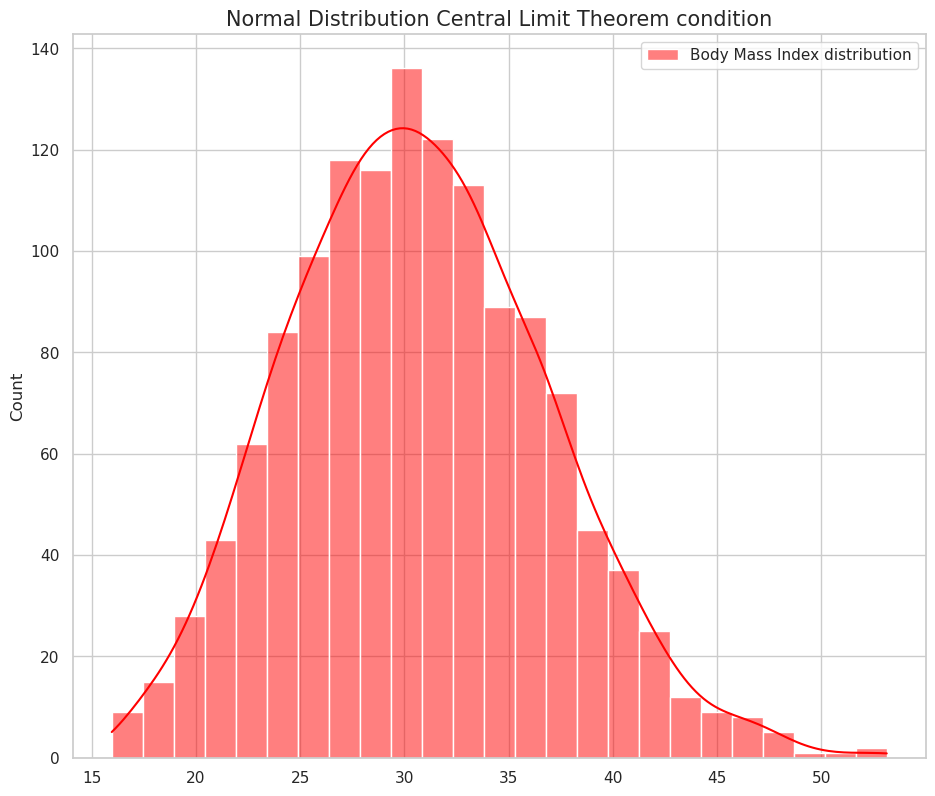

In [7]:
bmi = df['bmi'].values.tolist()

sns.histplot(
    bmi, 
    color='red', 
    kde=True,  
    label='Body Mass Index distribution'
);
plt.title('Normal Distribution Central Limit Theorem condition', fontsize = 15);
plt.legend(loc='upper right');

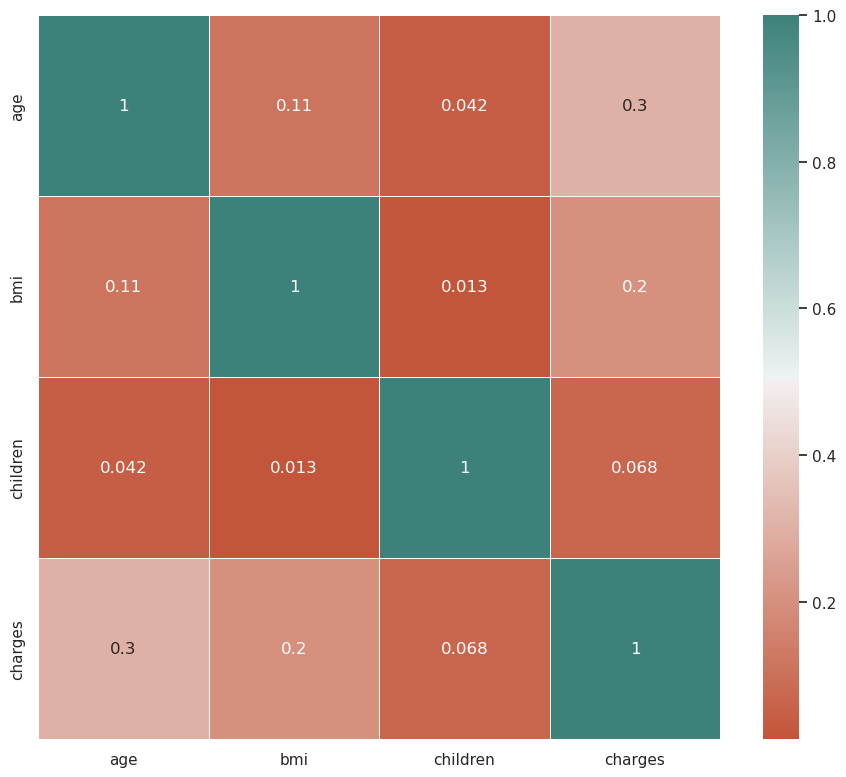

In [8]:

sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    linewidths=0.5, 
    cmap=sns.diverging_palette(20,180, as_cmap=True),
    linecolor='white'
);

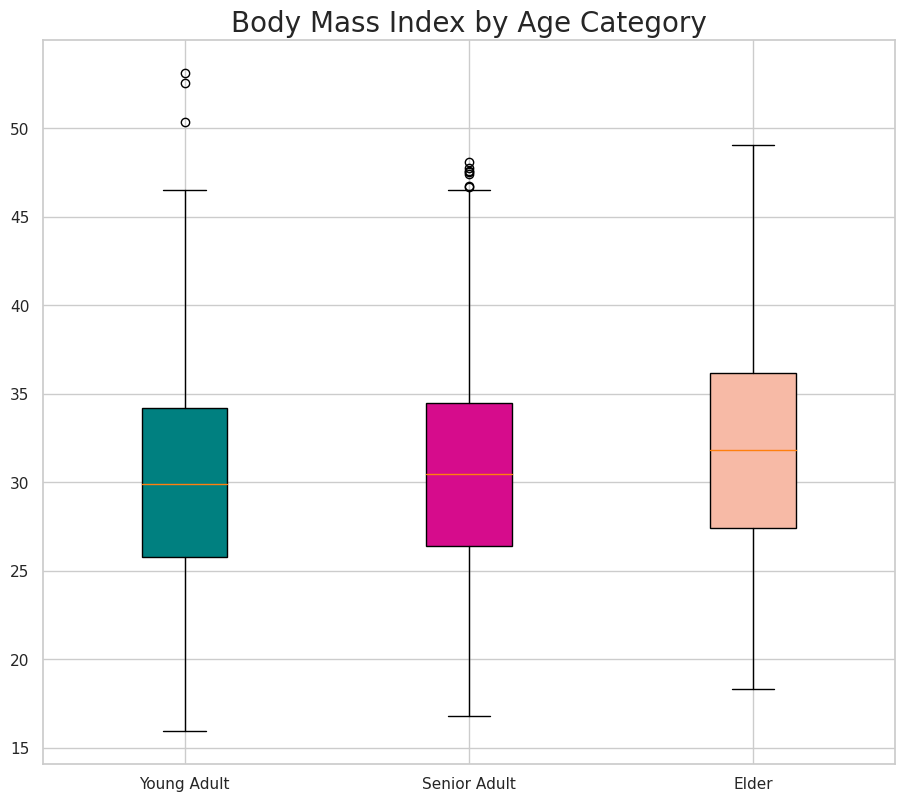

In [9]:
young_adults = df['bmi'].loc[df['age_cat'] == 'Young Adult'].values
senior_adults = df['bmi'].loc[df['age_cat'] == 'Senior Adult'].values
elders = df['bmi'].loc[df['age_cat'] == 'Elder'].values

data_to_plot = [young_adults, senior_adults, elders]
labels = ['Young Adult', 'Senior Adult', 'Elder']

colors = [(0/255, 128/255, 128/255), (214/255, 12/255, 140/255), (247/255, 186/255, 166/255)]

fig, ax = plt.subplots()

bp=ax.boxplot(data_to_plot, labels=labels, patch_artist=True);
plt.title('Body Mass Index by Age Category', fontsize = 20);


for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)

### Comparing independent categorical Variables (ANOVA)
* **P-value:** The p-value being heigher than 0.05 tell us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it come to Body Mass Index.

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

(
    ols(
        formula='bmi ~ age_cat',
        data=df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Fri, 24 May 2024   Prob (F-statistic):            0.00268
Time:                        13:02:35   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  31.7393      0.413     76.776      0.000      30.928      32.550
age_cat[T.Senior Adult]    -0.9202      0.488     -1.885      0.060      -1.878       0.037
age_cat[T.Young Adult]     -1.6295      0.485     -3.360      0.001      -2.581      -0.678
==============================================================================
Omnibus:                       19.635   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.284
Skew:                           0.301   Prob(JB):                     3.94e-05
Kurtosis:                       2.981   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


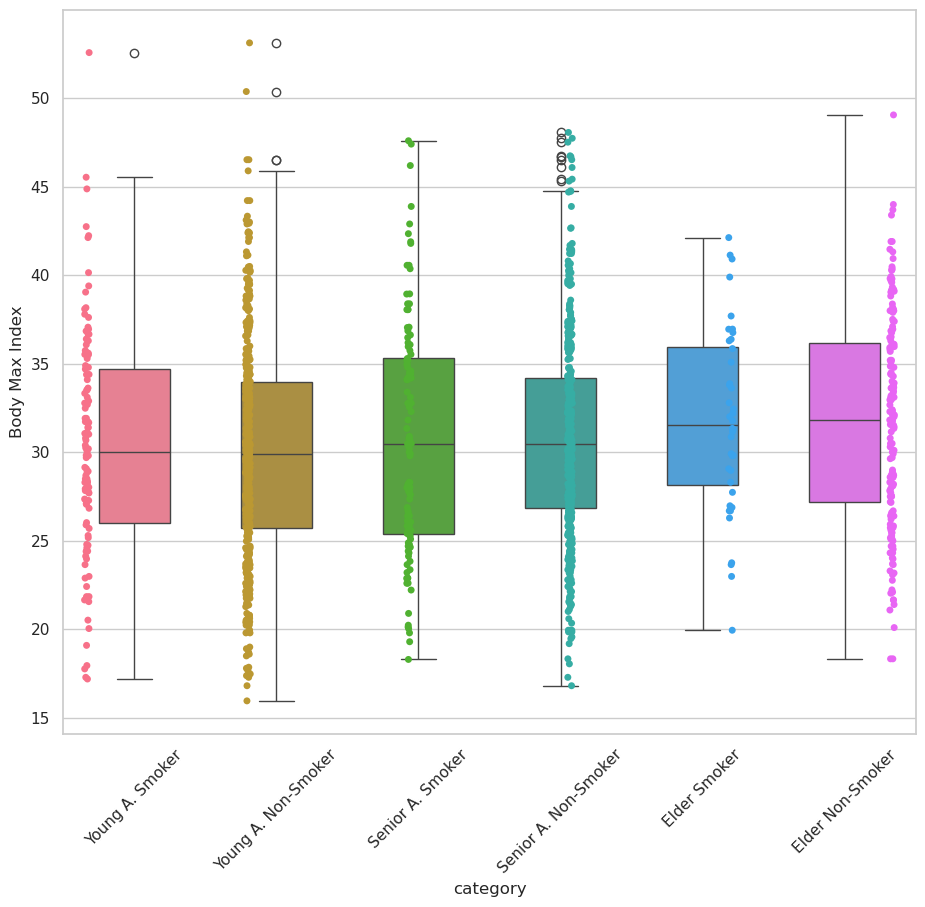

In [12]:
ya_smoker = df['bmi'].loc[(df['age_cat'] == 'Young Adult') & (df['smoker']== 'yes')].values
sa_smoker = df['bmi'].loc[(df['age_cat'] == 'Senior Adult') & (df['smoker']== 'yes')].values
e_smoker = df['bmi'].loc[(df['age_cat'] == 'Elder') & (df['smoker']== 'yes')].values

ya_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Young Adult') & (df['smoker']== 'no')].values
sa_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Senior Adult') & (df['smoker']== 'no')].values
e_nonsmoker = df['bmi'].loc[(df['age_cat'] == 'Elder') & (df['smoker']== 'no')].values

categories = ['Young A. Smoker', 'Young A. Non-Smoker', 'Senior A. Smoker', 'Senior A. Non-Smoker', 'Elder Smoker', 'Elder Non-Smoker']

y0 = ya_smoker
y1 = ya_nonsmoker
y2 = sa_smoker
y3 = sa_nonsmoker
y4 = e_smoker
y5 = e_nonsmoker

values = [y0, y1, y2, y3, y4, y5]

df_plot = pd.DataFrame()

for category, value in zip(categories, values):
    df_temp = pd.DataFrame({'category': category, 'Body Max Index': value})
    df_plot = pd.concat([df_plot, df_temp])



sns.boxplot(data = df_plot, x='category', y='Body Max Index', width=0.5,palette='husl' );
plt.xticks(rotation=45);
sns.stripplot(data = df_plot, x='category', y='Body Max Index', palette='husl', dodge=True);


### Who got charged more on Avarage by Age?
* **Patient Charge Mean**: For **Young adults** it is 7,944, for **Senior Adults** it is 14,785 and for the **elder** it is 18,795

* **Patient Charge Median** For **Young adults** it is 4,252, for **Senior Adults** it is 9,565 and for the **elder** it is 13,429

* **Mean and the Median**: Sometimes we must be careful when using the mean since it is prone to be affected by outliers. 

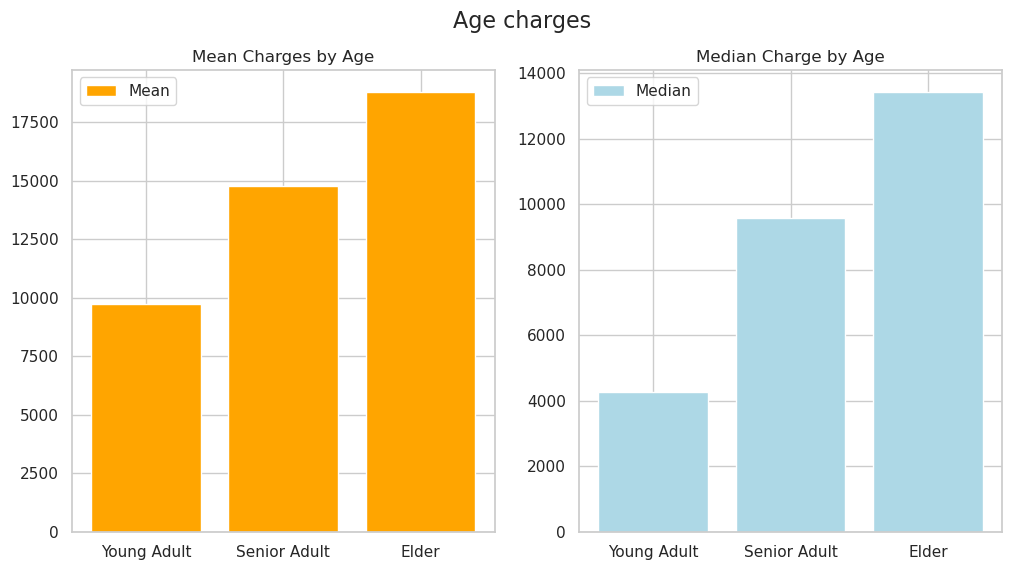

In [13]:
# Mean could be affected easily bt outliers or extreme cases.

# Means
avg_ya_charge = df['charges'].loc[df['age_cat'] == 'Young Adult'].mean()
avg_sa_charge  = df['charges'].loc[df['age_cat'] == 'Senior Adult'].mean()
avg_e_charge  = df['charges'].loc[df['age_cat'] == 'Elder'].mean()

# Medians

med_ya_charge = df['charges'].loc[df['age_cat'] == 'Young Adult'].median()
med_sa_charge = df['charges'].loc[df['age_cat'] == 'Senior Adult'].median()
med_e_charge  = df['charges'].loc[df['age_cat'] == 'Elder'].median()

categories = ['Young Adult', 'Senior Adult', 'Elder']
values_mean = [avg_ya_charge, avg_sa_charge, avg_e_charge]
values_median = [med_ya_charge, med_sa_charge, med_e_charge]

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Age charges', fontsize = 16) 

ax1.bar(categories, values_mean, color='#FFA500',label='Mean');
ax1.set_title('Mean Charges by Age', fontsize = 12);
ax1.legend(loc='upper left');


ax2.bar(categories, values_median, color='lightblue', label='Median');
ax2.set_title('Median Charge by Age');
ax2.legend(loc='upper left');



### Weight Status

[Body Weight and Cancer Risk](https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html)

Turning BMI into categorical variables: 
* **Under Weight**: Body Mass Index (BMI) < 18.5
* **Normal weight**: Body Mass Index (BMI) >= 18.5 and Body Mass Index (BMI) < 24.9
* **Overweight**: Body Mass Index (BMI) >= 25 and Body Mass Index (BMI) < 29.9
* **Obese**: Body Mass Index (BMI) > 30

In [14]:
df['weight_condition'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['bmi'] < 18.5, 'weight_condition'] = 'Underweight'
    col.loc[(col['bmi'] >= 18.5) & (col['bmi'] < 24.986), 'weight_condition'] = 'Normal Weight'
    col.loc[(col['bmi'] >= 25) & (col['bmi'] < 29.926), 'weight_condition'] = 'Overweight'
    col.loc[col['bmi'] >= 30, 'weight_condition'] = 'Obese'

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


Text(0.5, 1.0, 'Relationship between Smokers and Charges')

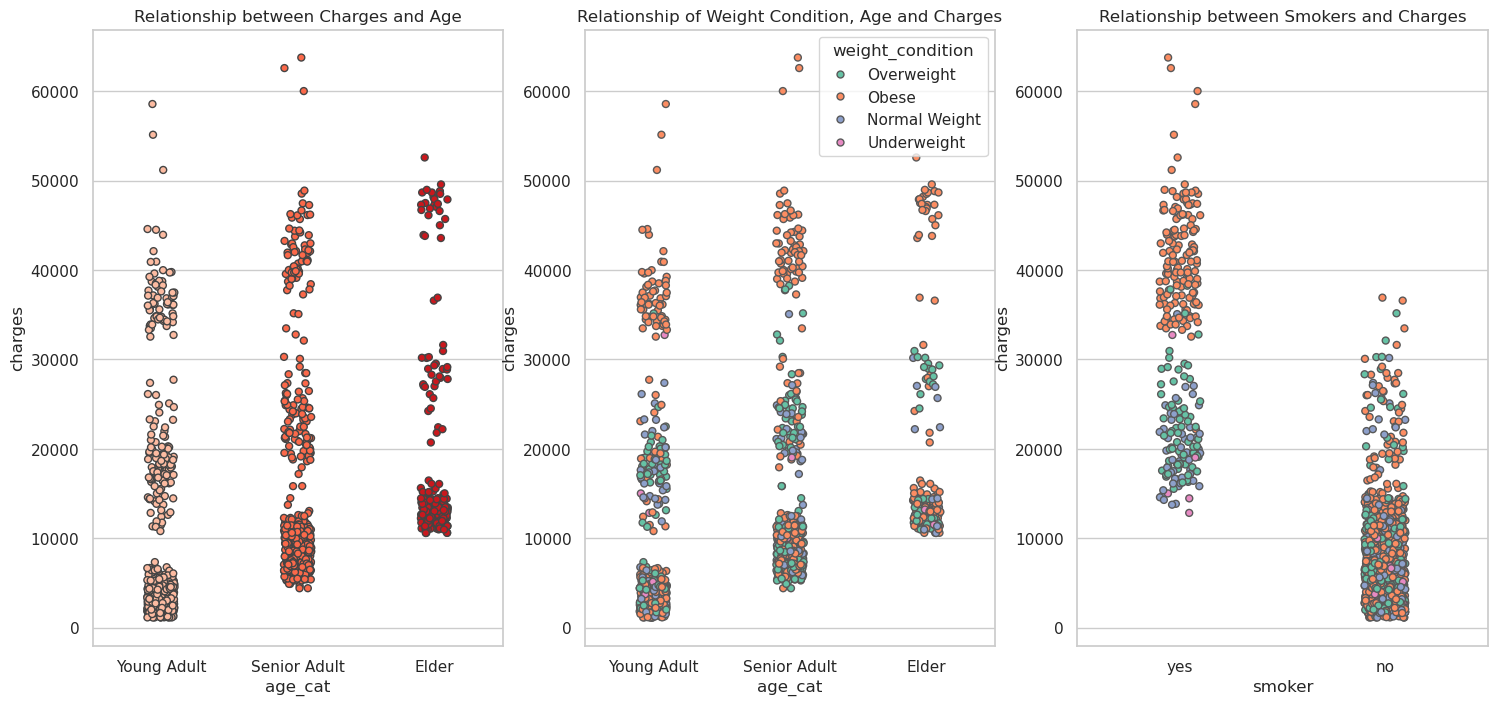

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(
    data=df,
    x='age_cat', 
    y='charges', 
    ax=ax1, 
    linewidth=1, 
    palette='Reds'
)
ax1.set_title('Relationship between Charges and Age')

sns.stripplot(
    data=df,  
    ax=ax2, 
    x='age_cat', 
    y='charges', 
    hue='weight_condition', 
    linewidth=1, 
    palette='Set2'
)
ax2.set_title('Relationship of Weight Condition, Age and Charges')

sns.stripplot(
    x='smoker',
    y='charges',
    hue='weight_condition',
    data=df,
    ax=ax3,
    linewidth=1,
    palette='Set2'
)
ax3.legend_.remove()
ax3.set_title('Relationship between Smokers and Charges')

In [16]:
# Make sure we don't have any null values

df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition


### Weight status vs Charges

* **Overweight**: Notice how there are two groups of people that get significantly charged more than the other group of overweight people.
* **Obse**: Same thing goes with the obese group, were a significant group is charged more than the other group.

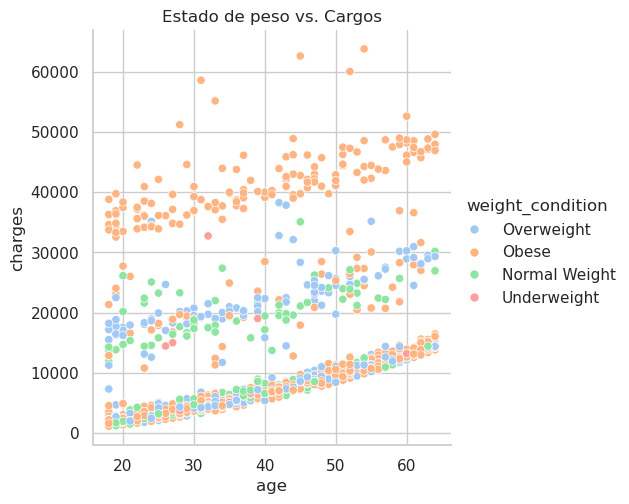

In [17]:
with sns.color_palette("pastel"):
    sns.relplot(
        data=df,
        x='age',
        y='charges',
        hue='weight_condition',
        height=5,  
        aspect=1  
    )
    plt.title('Estado de peso vs. Cargos')

In [18]:
# First find the average or median of the charges obese people paid. 

obese_avg = df['charges'].loc[df['weight_condition'] == 'Obese'].mean()

df['charge_status'] = np.nan

lst = [df]

for col in lst:
    col.loc[col['charges'] > obese_avg, 'charge_status'] = 'Above Average'
    col.loc[col['charges'] < obese_avg, 'charge_status'] = 'Below Average'

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,charge_status
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight,Above Average
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese,Below Average
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese,Below Average
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight,Above Average
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight,Below Average


In [19]:
# No nulls
df['charge_status'].isnull().sum()

0

### Obesity and the impact of smoking to the wallet: 
* Notice in the **charges** box how smoking looks to have a cartain impact on medical costs.
* Lest's find out how much of a difference there is between the group of obese patients that smoke compared to the group of obese patients that don't smoke.

Text(0.5, 1.0, 'Smokers')

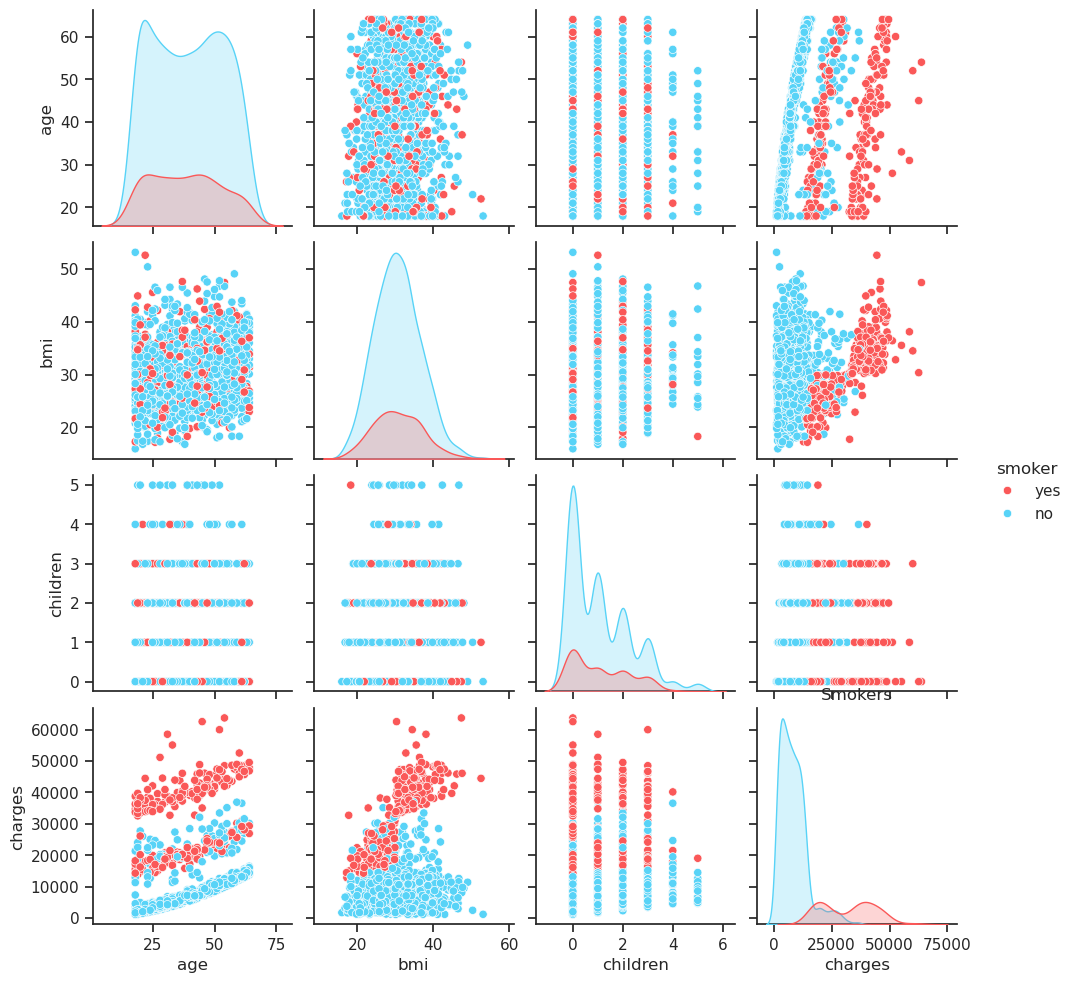

In [20]:
sns.set_style('ticks')
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue='smoker', palette=pal)
plt.title('Smokers')

In [55]:
# what percentage of obese that smoked paid above avarage from the total obese patients?
# 79% of obese were non-smokers while 21% were smokers

total_obese = len(df.loc[df['weight_condition'] =='Obese'])

obese_smoker_prop = len(df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'yes')]) / total_obese

obese_smoker_prop = round(obese_smoker_prop, 2)
print(obese_smoker_prop)

obese_nonsmoker_prop = len(df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'no')]) / total_obese

obese_nonsmoker_prop = round(obese_nonsmoker_prop, 2)
print(obese_nonsmoker_prop)
# Average charge by obese_smokers and obese_nonsmokers

# (df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")])

0.21
0.79


### Distribution of charges (Obese Smoker vs Obese non-smoker)

* **Violin Plots**: We will be using violing plots to compare the distribution of patients of **the obese group who are smokers and non-smokers.**
* **Obese smokers distribution**: Most obese smokers pay aroung 40k in medical costs!
* **Obese non-smoker distribution**: Most obese non-smokers pay 8k in medical costs.
* **Smoking a factor to the wallet**: Smoking is definitely a big factor for obese patients when it comes to medical cost. A difference of more than 30k!

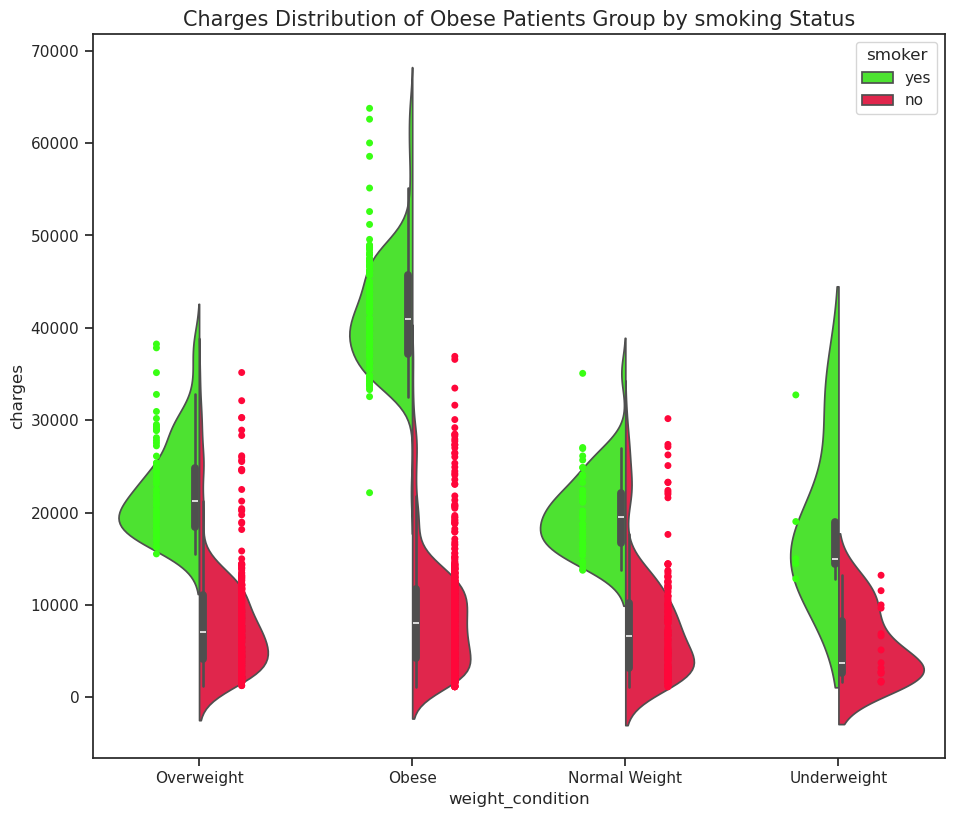

In [79]:
custom_palette = {
    'yes': '#39FF14',  
    'no': '#FF073A'
}


sns.violinplot(
    x='weight_condition',
    y='charges',
    hue='smoker',
    data=df,
    palette=custom_palette,
    split=True
);

plt.title('Charges Distribution of Obese Patients Group by smoking Status', size = 15);

sns.stripplot(
    x='weight_condition',
    y='charges',
    hue='smoker',
    data=df,
    palette=custom_palette,
    dodge=True,
    jitter=False,
);

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='smoker');

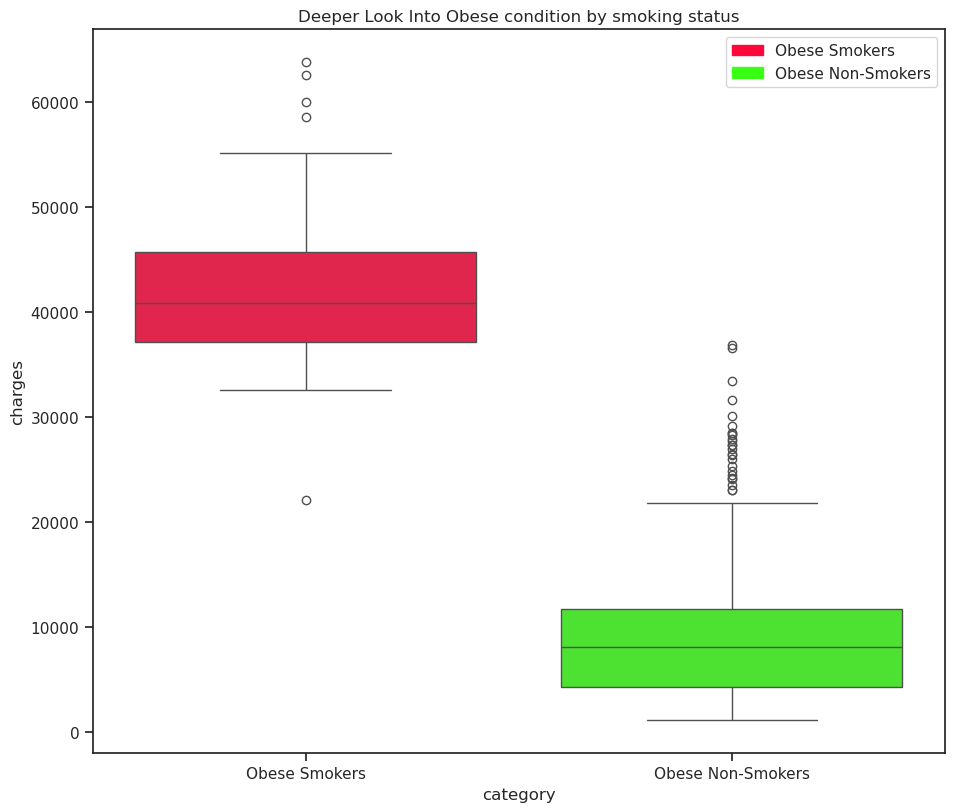

In [116]:
# Hmmm we have to look closer into Obese there is an obvious difference
import matplotlib.patches as mpatches

chargedist_sm = df['charges'].loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'yes')].values

chargedist_nsm = df['charges'].loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'no')].values


values = [chargedist_sm, chargedist_nsm]
categories = ['Obese Smokers', 'Obese Non-Smokers']

custom_palette_box ={
    'Obese Non-Smokers' : '#39FF14',
    'Obese Smokers' : '#FF073A' 

}

df_plot = pd.DataFrame()

for category, values in zip(categories,values):
    df_temp = pd.DataFrame({'category': category, 'charges': values})
    df_plot = pd.concat([df_plot, df_temp])

handle1 = mpatches.Patch(color='#FF073A', label='Obese Smokers')
handle2 = mpatches.Patch(color='#39FF14', label='Obese Non-Smokers')

sns.boxplot(data=df_plot, x='category', y='charges', palette =custom_palette_box )
plt.title('Deeper Look Into Obese condition by smoking status')
plt.legend(handles=[handle1, handle2])

### Seperation in charges between Obese Smokers vs Non-Obese Smokers

In this chart we can visualize how can **separate** obese smokers and obese non-smokers into different **cluseter** of groups. Therefore, we can say that smoking is a **characteristic** that definitely affects patient's chrages

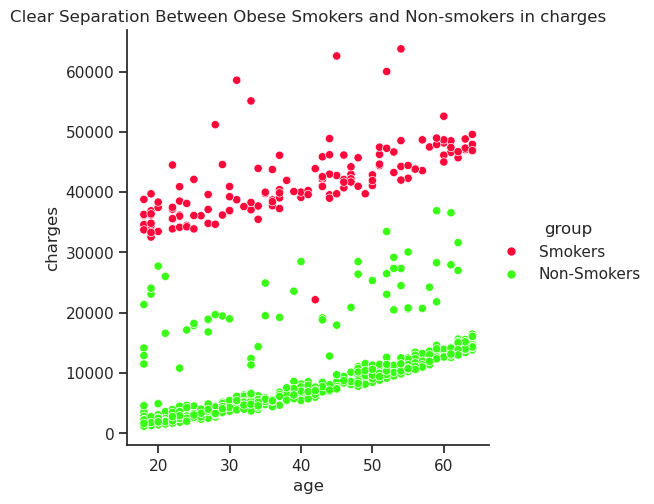

In [151]:
# Create a scatter plot with all the Obese

obese_smoker = df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'yes')]

obese_nonsmoker = df.loc[(df['weight_condition'] == 'Obese') & (df['smoker'] == 'no')]


obese_data = pd.concat([obese_smoker.assign(group='Smokers'), obese_nonsmoker.assign(group='Non-Smokers')])
obese_data

sns.relplot(
    x='age', 
    y='charges', 
    hue='group', 
    data=obese_data, 
    kind='scatter', 
    palette={
        'Smokers': '#FF073A', 
        'Non-Smokers': '#39FF14'
    });
plt.title('Clear Separation Between Obese Smokers and Non-smokers in charges');